In [1]:
import sys, os

sys.executable

'C:\\Users\\ridhidandona\\AppData\\Local\\Continuum\\anaconda3\\python.exe'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn import preprocessing

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [5]:
from sklearn.impute import KNNImputer

#Suppress Warnings

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt

#the output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline 

# Import the Dataset

In [8]:
import os

os.getcwd()


'C:\\Work Files\\IIMB BAI\\Assignments\\Assignment 1'

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
raw_df = pd.read_csv( "Assignment 1_Cases and Datasets-20200722/IMB 553 HR Analytics - Modified.csv")

In [11]:
if set(['Candidate Ref', 'Percent difference CTC']).issubset(raw_df.columns):
    raw_df.drop(['Candidate Ref', 'Percent difference CTC'],axis=1, inplace=True)

Create Train and Test dataset 

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(raw_df, test_size = 0.2)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9866 entries, 2945 to 8929
Data columns (total 35 columns):
DOJ Extended                   9866 non-null object
D-DOJ Extended                 9866 non-null int64
Duration to accept offer       7711 non-null float64
Notice period                  9866 non-null int64
Offered band                   9866 non-null object
E0                             9866 non-null int64
E1                             9866 non-null int64
E2                             9866 non-null int64
E3                             9866 non-null int64
E4                             9866 non-null int64
E5                             9866 non-null int64
Pecent hike expected in CTC    9270 non-null float64
Percent hike offered in CTC    9390 non-null float64
Joining Bonus                  9866 non-null object
D-Joining Bonus                9866 non-null int64
Candidate relocate actual      9866 non-null object
Gender                         9866 non-null object
Candidate So

In [13]:
print('Training data shape: ', train_df.shape)
print('Testing data shape: ', test_df.shape)

Training data shape:  (9866, 35)
Testing data shape:  (2467, 35)


In [14]:
train_df['D-Joining'].value_counts()

1    6989
0    2877
Name: D-Joining, dtype: int64

Text(0.0, 2880, '29.16%')

Text(1.0, 6992, '70.84%')

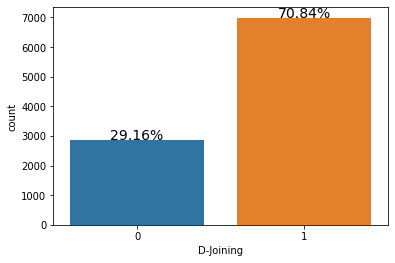

In [15]:
s = sns.countplot(x = 'D-Joining',data = train_df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train_df)*100),
            ha="center", fontsize=14) 

So about 29% potential employees have not joined. 

#Detecting Missing Values

In [16]:
#Calculating % of missing values in each column

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
train_missing= missing_values_table(train_df)
train_missing

Your selected dataframe has 35 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
Duration to accept offer,2155,21.8
Pecent hike expected in CTC,596,6.0
Percent hike offered in CTC,476,4.8
D-Bangalore,66,0.7
D-Chennai,66,0.7
D-Mumbai,66,0.7
D-Delhi NCR,66,0.7
D-Hyderabad,66,0.7


In [18]:
test_missing= missing_values_table(test_df)
test_missing

Your selected dataframe has 35 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
Duration to accept offer,564,22.9
Pecent hike expected in CTC,151,6.1
Percent hike offered in CTC,120,4.9
D-Bangalore,20,0.8
D-Chennai,20,0.8
D-Mumbai,20,0.8
D-Delhi NCR,20,0.8
D-Hyderabad,20,0.8


In [19]:
import missingno as msno

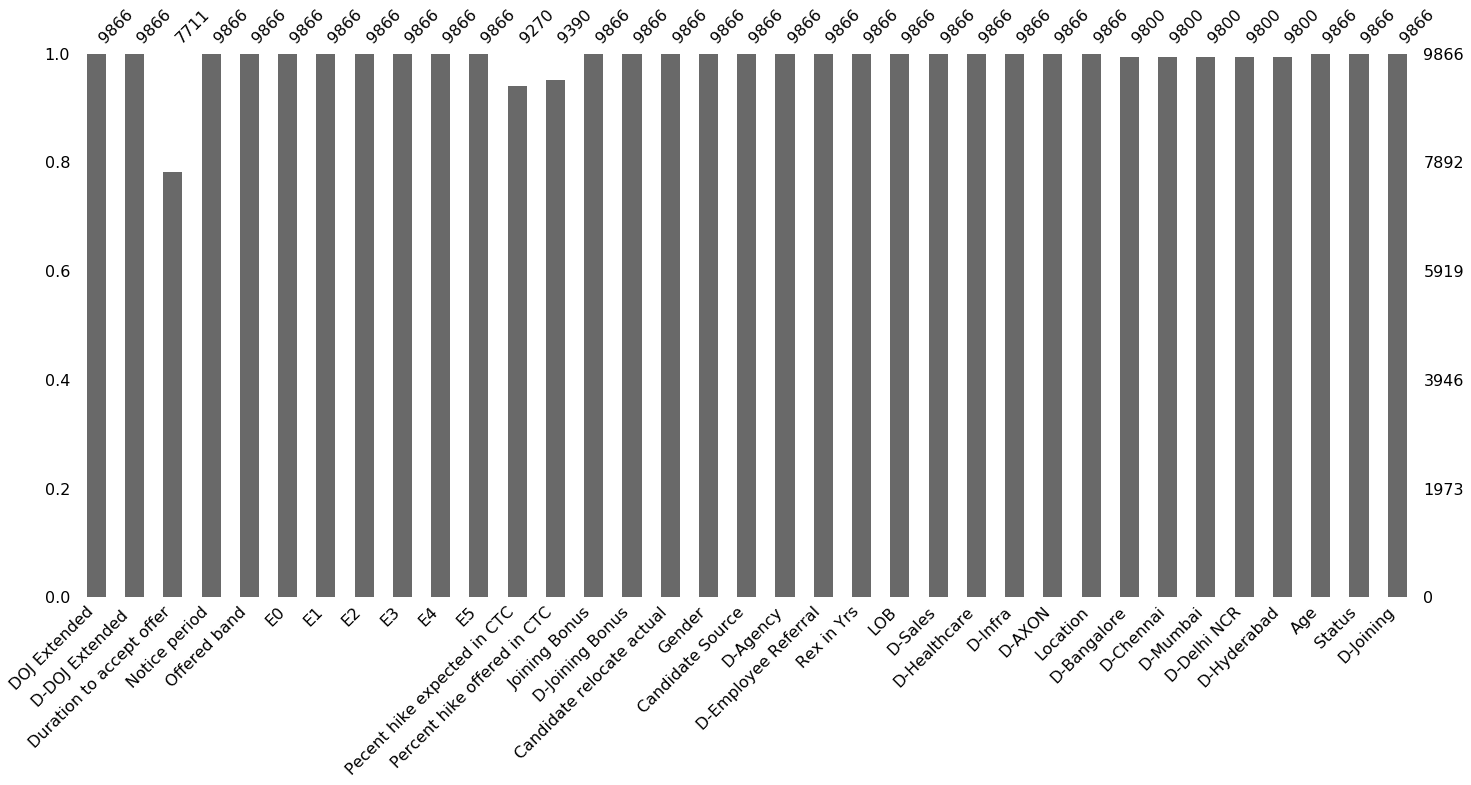

In [20]:
msno.bar(train_df)

# Locating the missing data within the dataset

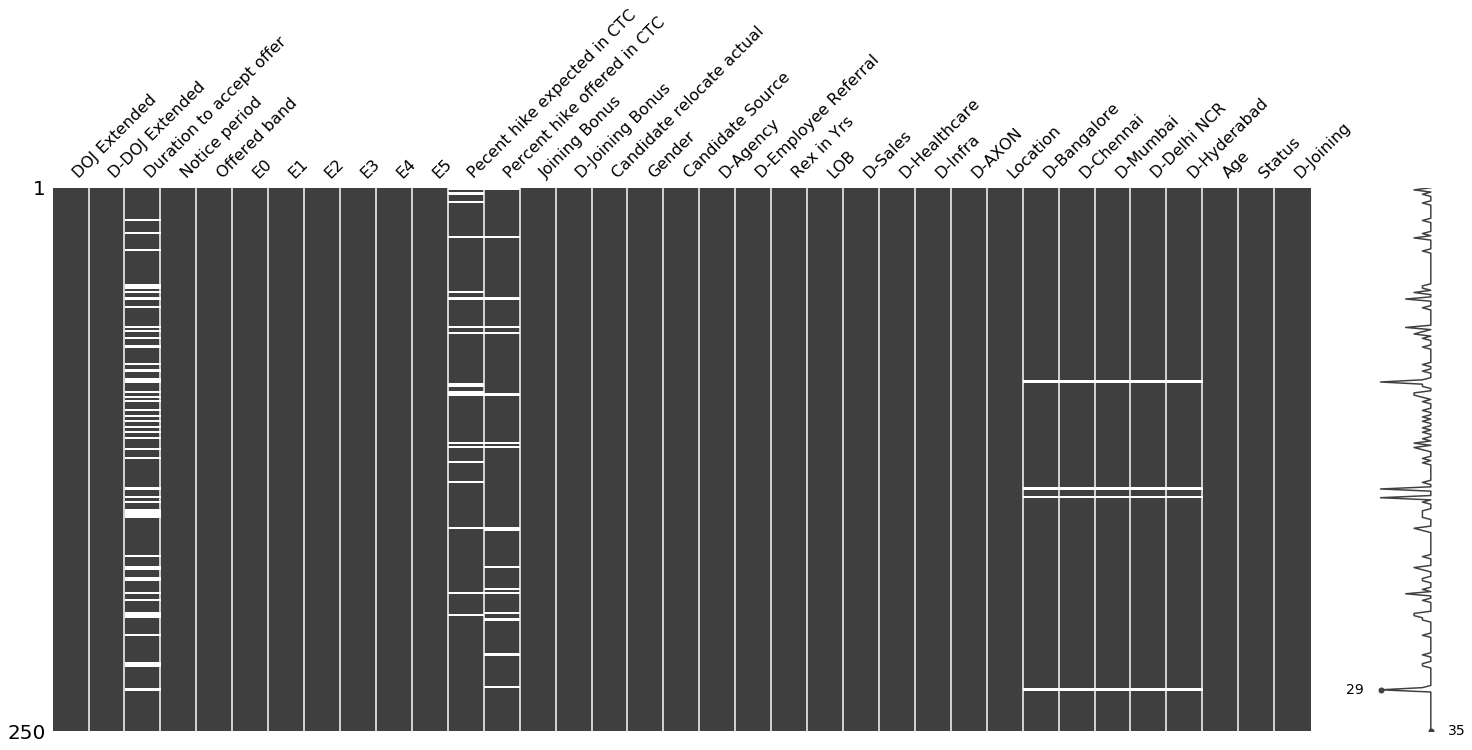

In [21]:
msno.matrix(train_df.sample(250))

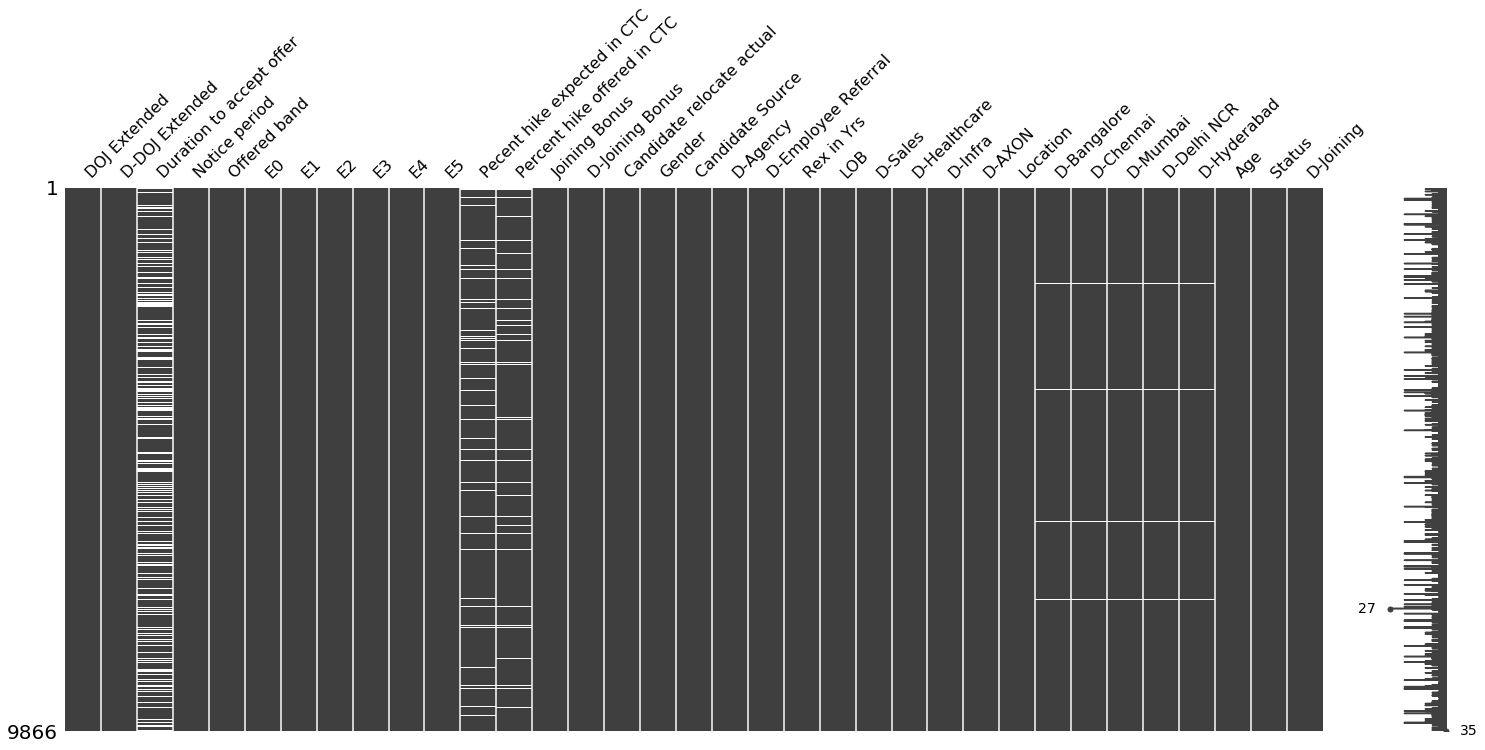

In [22]:
msno.matrix(train_df)

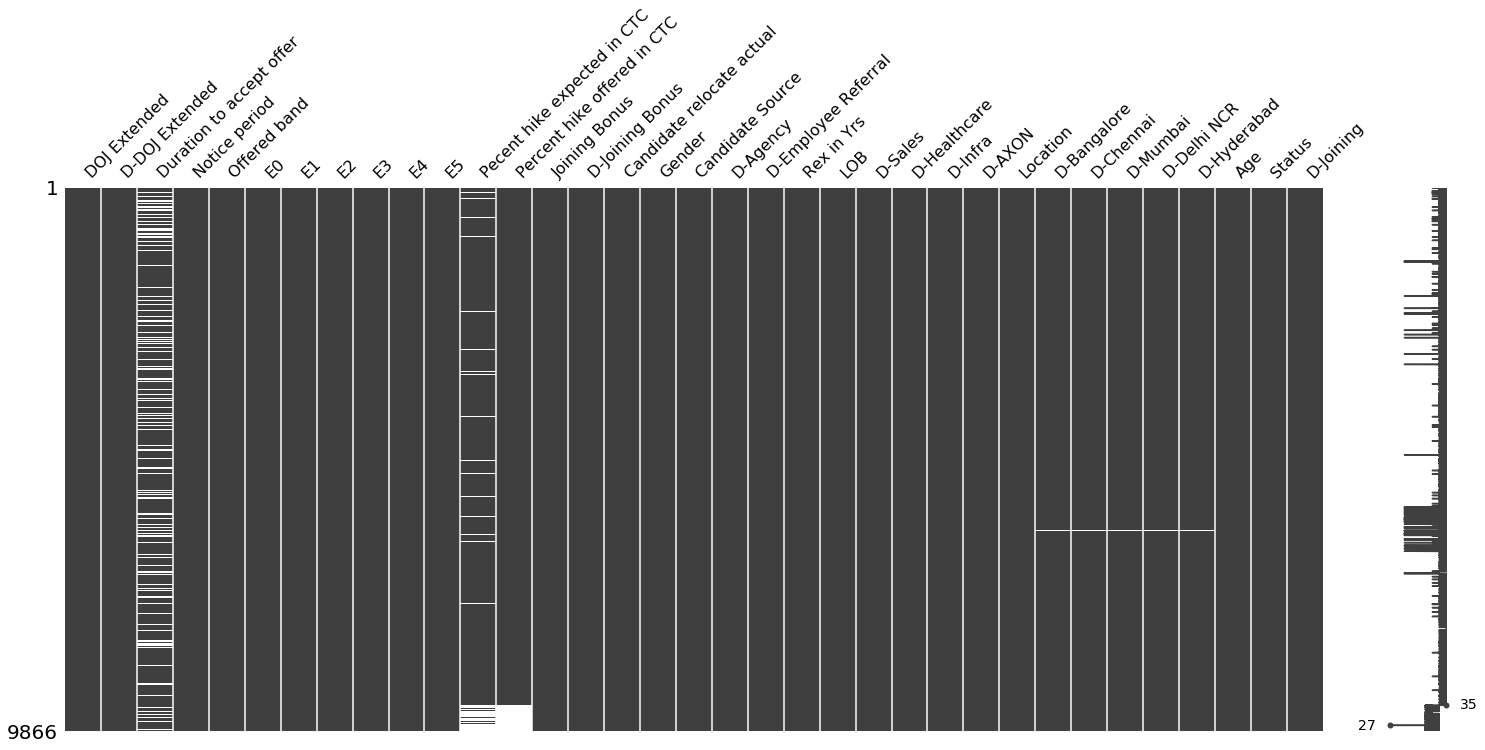

In [23]:
#Sorting by 'percent hike offered in CTC'
sorted = train_df.sort_values('Percent hike offered in CTC')
msno.matrix(sorted)

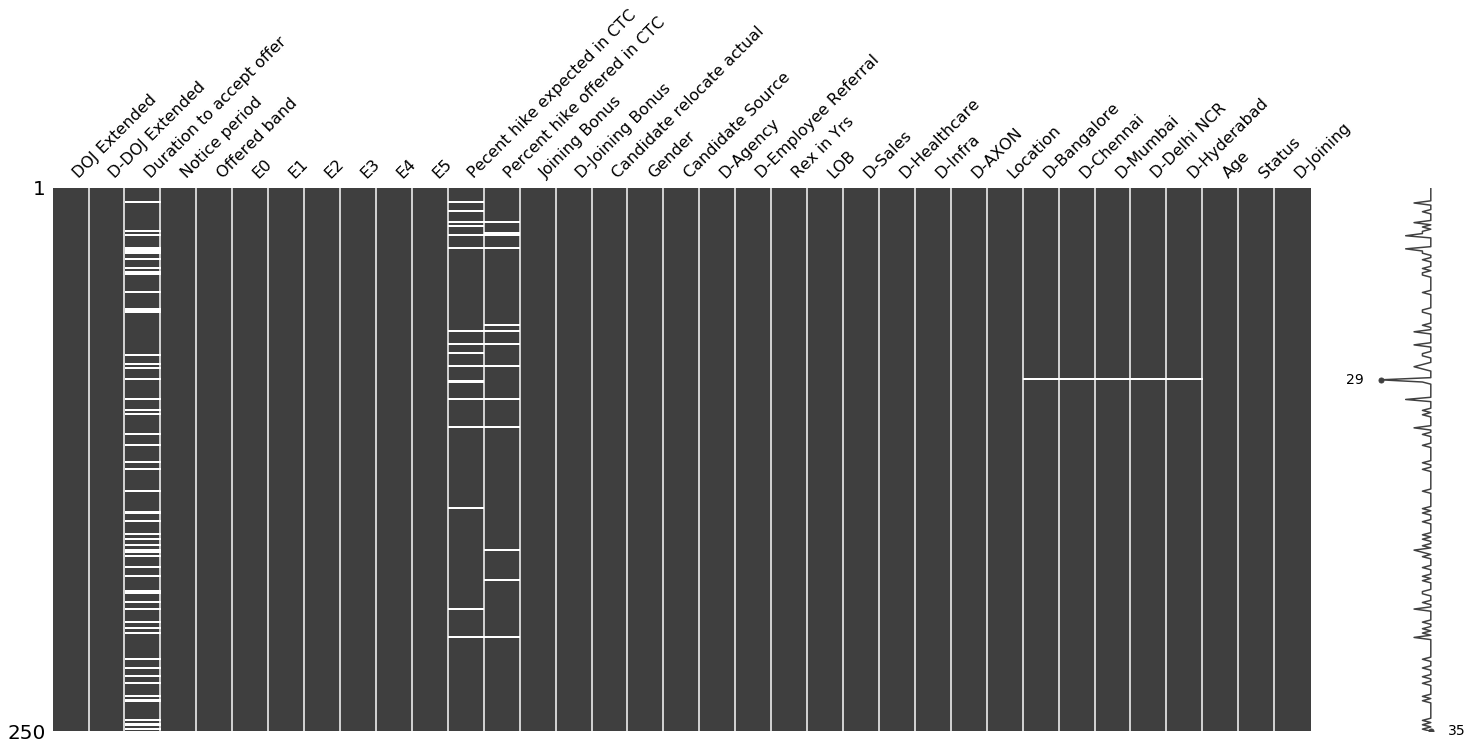

In [24]:
msno.matrix(sorted.sample(250))

Missing values in 'Percent hike offered in CTC' appears to be related to 'Percent hike expected in CTC'. Hence, Checking that again with a Heatmap - 

# Heatmap

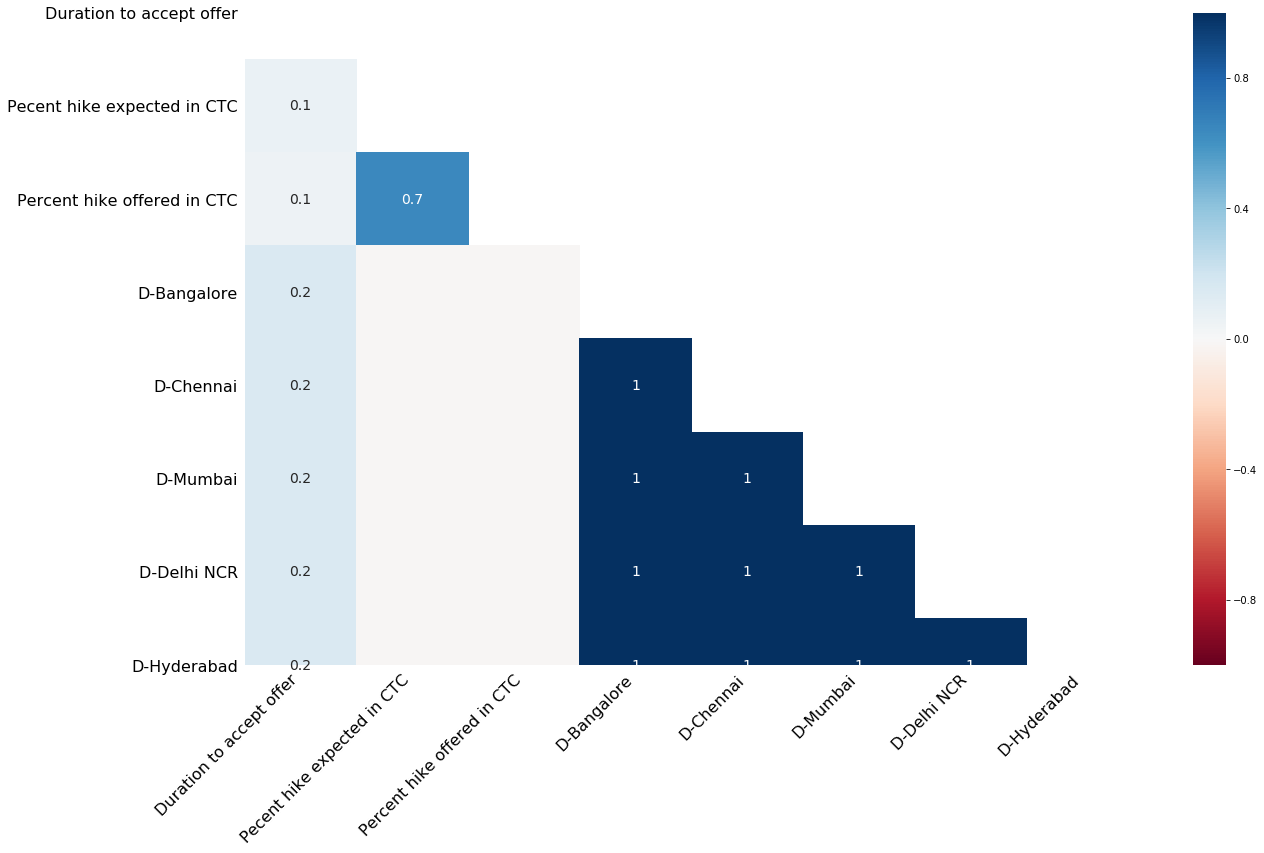

In [25]:
msno.heatmap(train_df)

There is a 0.6 correlation between 'Percent hike offered in CTC' and 'Percent hike expected in CTC'. 

Using a Dendrogram to group highly correlated variables together

# Dendrogram

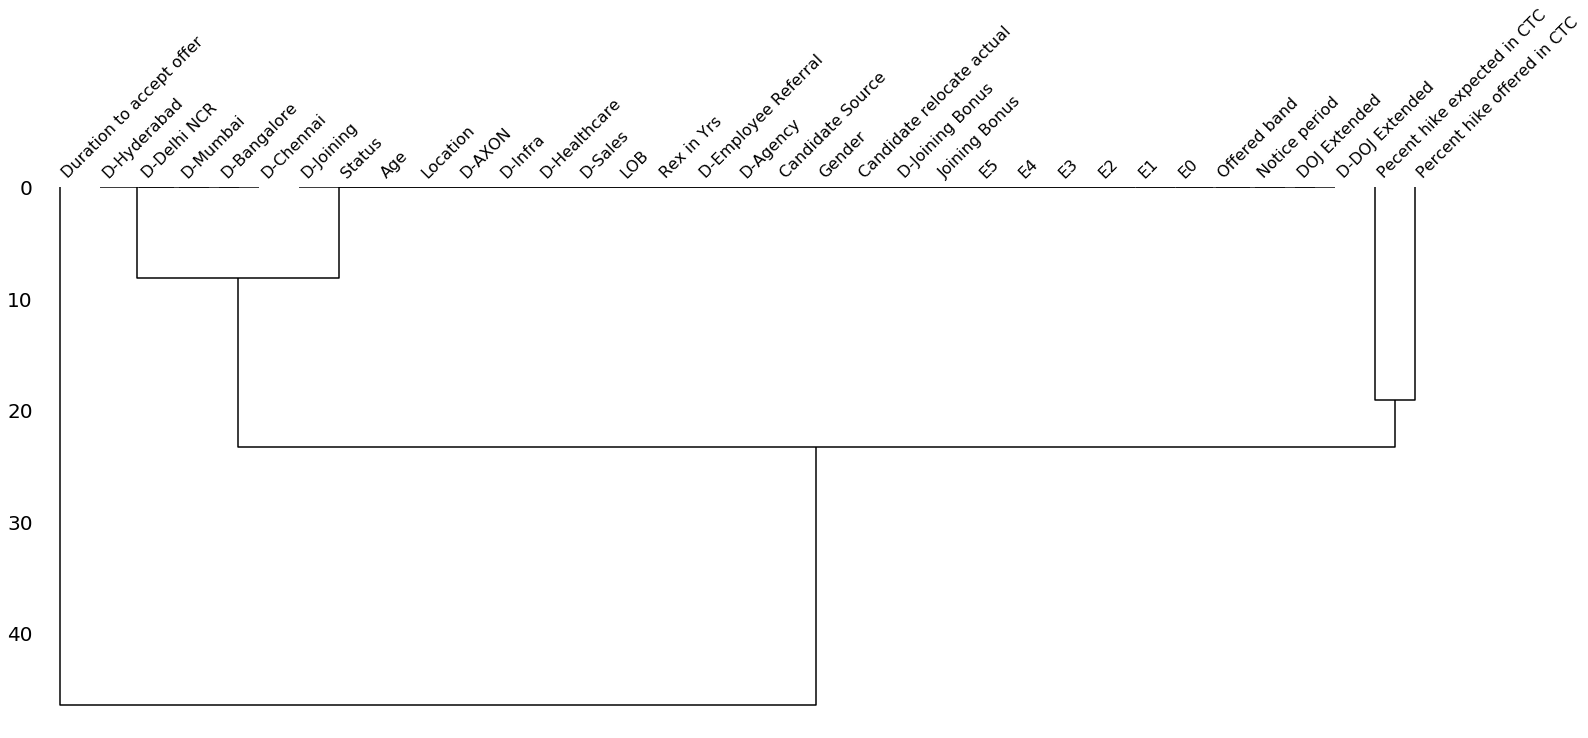

In [26]:
msno.dendrogram(train_df)

This shows that 'Percent hike offered in CTC' and 'Percent hike expected in CTC' are very similar, and the missingness in these columns tends to be related to location

# Treating Missing Values

### Pairwise Deletion

In pairwise deletion, only missing data are deleted. Used only for MCAR

In [27]:
train_df.isnull().sum()

DOJ Extended                      0
D-DOJ Extended                    0
Duration to accept offer       2155
Notice period                     0
Offered band                      0
E0                                0
E1                                0
E2                                0
E3                                0
E4                                0
E5                                0
Pecent hike expected in CTC     596
Percent hike offered in CTC     476
Joining Bonus                     0
D-Joining Bonus                   0
Candidate relocate actual         0
Gender                            0
Candidate Source                  0
D-Agency                          0
D-Employee Referral               0
Rex in Yrs                        0
LOB                               0
D-Sales                           0
D-Healthcare                      0
D-Infra                           0
D-AXON                            0
Location                          0
D-Bangalore                 

In [28]:
train_1 = train_df.copy()
train_1['Percent hike offered in CTC'].mean()

37.724664536740555

# Listwise Deletion

In listwise deletion, complete rows with missing values are deleted. Also known as Complete Case deletion and applicable to MCAR only

In [45]:
train_2 = train_df.copy()
train_2.dropna(how='any',inplace=True)
train_2['Percent hike offered in CTC'].isnull().sum()

0

In [46]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7235 entries, 2945 to 8929
Data columns (total 35 columns):
DOJ Extended                   7235 non-null object
D-DOJ Extended                 7235 non-null int64
Duration to accept offer       7235 non-null float64
Notice period                  7235 non-null int64
Offered band                   7235 non-null object
E0                             7235 non-null int64
E1                             7235 non-null int64
E2                             7235 non-null int64
E3                             7235 non-null int64
E4                             7235 non-null int64
E5                             7235 non-null int64
Pecent hike expected in CTC    7235 non-null float64
Percent hike offered in CTC    7235 non-null float64
Joining Bonus                  7235 non-null object
D-Joining Bonus                7235 non-null int64
Candidate relocate actual      7235 non-null object
Gender                         7235 non-null object
Candidate So

In [31]:
train_missing

,Missing Values,% of Total Values
Duration to accept offer,2155,21.8
Pecent hike expected in CTC,596,6.0
Percent hike offered in CTC,476,4.8
D-Bangalore,66,0.7
D-Chennai,66,0.7
D-Mumbai,66,0.7
D-Delhi NCR,66,0.7
D-Hyderabad,66,0.7


Since only about 5% of data is missing in 'PErcent hike offered in CTC', we can go with listwise deletion assuming that this is MCAR

# KNN Imputation

In [32]:
train_knn = train_df.copy(deep=True)

In [35]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
train_knn['Percent hike offered in CTC'] = knn_imputer.fit_transform(train_knn[['Percent hike offered in CTC']])

In [36]:
train_knn['Percent hike offered in CTC'].isnull().sum()

0

In [38]:
train_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9866 entries, 2945 to 8929
Data columns (total 35 columns):
DOJ Extended                   9866 non-null object
D-DOJ Extended                 9866 non-null int64
Duration to accept offer       7711 non-null float64
Notice period                  9866 non-null int64
Offered band                   9866 non-null object
E0                             9866 non-null int64
E1                             9866 non-null int64
E2                             9866 non-null int64
E3                             9866 non-null int64
E4                             9866 non-null int64
E5                             9866 non-null int64
Pecent hike expected in CTC    9270 non-null float64
Percent hike offered in CTC    9866 non-null float64
Joining Bonus                  9866 non-null object
D-Joining Bonus                9866 non-null int64
Candidate relocate actual      9866 non-null object
Gender                         9866 non-null object
Candidate So

In [40]:
train_knn.shape

(9866, 35)

In [41]:
train_knn.to_csv("Assignment 1_Cases and Datasets-20200722/KNN Imputed Scaleneworks.csv")

In [43]:
train_knn['Percent hike offered in CTC'].mean()

37.72466453674021

In [44]:
train_df['Percent hike offered in CTC'].mean()

37.724664536740555